In [68]:
### Keras and Tensorflow > 2.0

## Loading Data

In [69]:
data_source = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv(data_source)

In [72]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [73]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [74]:
df = df.sort_values(by='Date', ascending=True)

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [75]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [76]:
df.shape

(2035, 8)

In [77]:
df1 = df.reset_index()['Close']

In [78]:
df1.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

In [79]:
df1.shape

(2035,)

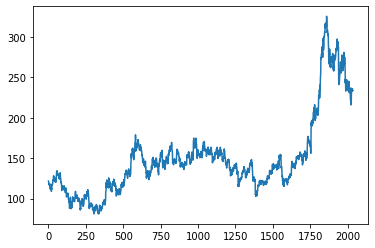

In [80]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [81]:
# LSTM are sensitive to the scale of the data. So we apply MinMax Scaler

In [82]:
import numpy as np

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [84]:
# now it has been transformed between 0 to 1
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [85]:
# splitting dataset into train and test split

# 65% of the total length of the dataframe should be training size
training_size = int(len(df1)*0.65)

# test size will be the length of the dataframe minus training size
test_size = len(df1) - training_size

# by using these lengths, we are creating train_data and test_data
train_data, test_data = df1[0: training_size, :], df1[training_size: len(df1), :1]

In [86]:
training_size, test_size

(1322, 713)

In [87]:
len(train_data), len(test_data)

(1322, 713)

In [88]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

## Data Preprocessing

In [89]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step -1):
        
        a = dataset[i:(i + time_step), 0] # i = 0, 1, 2, 3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [90]:
# reshape into X = t, t+1, t+2, t+3 and Y = t+4
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [91]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


In [92]:
print(y_train)

[0.12254902 0.13010621 0.13541667 ... 0.18341503 0.19546569 0.18280229]


In [93]:
print(X_train.shape) 
print(y_train.shape)

(1221, 100)
(1221,)


In [94]:
print(X_test.shape) 
print(y_test.shape)

(612, 100)
(612,)


## Create a Stacked LSTM model

In [95]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [96]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 267ms/step - loss: 0.0165 - val_loss: 0.0585
Epoch 2/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0025 - val_loss: 0.0118
Epoch 3/100
20/20 [==============================] - 4s 193ms/step - loss: 9.5413e-04 - val_loss: 0.0041
Epoch 4/100
20/20 [==============================] - 4s 208ms/step - loss: 8.5650e-04 - val_loss: 0.0052
Epoch 5/100
20/20 [==============================] - 4s 196ms/step - loss: 8.2600e-04 - val_loss: 0.0052
Epoch 6/100
20/20 [==============================] - 4s 193ms/step - loss: 8.0043e-04 - val_loss: 0.0053
Epoch 7/100
20/20 [==============================] - 4s 212ms/step - loss: 7.8390e-04 - val_loss: 0.0045
Epoch 8/100
20/20 [==============================] - 4s 206ms/step - loss: 7.5438e-04 - val_loss: 0.0054
Epoch 9/100
20/20 [==============================] - 4s 210ms/step - loss: 7.2258e-04 - val_loss: 0.0053
Epoch 10/100
20/20 [==============================] - 4s 199ms

## Predict the test data and plot the output

In [101]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [102]:
# transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [103]:
# calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, train_predict, squared=False)

134.9981770201203

In [104]:
# RMSE of Test Data
mean_squared_error(y_test, test_predict, squared=False)

196.38655961382156

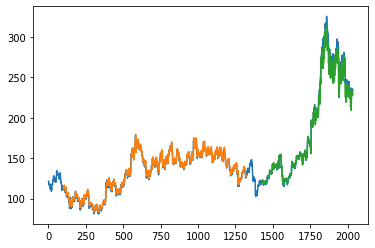

In [105]:
# Plotting
# Shift train predictions for plotting

look_back = 100

train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting

test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

## Predict the future 30 days and plot the output

In [106]:
len(test_data)

713

In [107]:
x_input = test_data[613:].reshape(1, -1)
x_input.shape

(1, 100)

In [108]:
# converting into list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [109]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [110]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i<30):

  if (len(temp_input)>100):

    # print(tem_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(x_input)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print(temp_input)

    lst_output.extend(yhat.tolist())
    i = i + 1

  else:

    x_input = x_input.reshape((1, n_steps, 1))
    
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))

    lst_output.extend(yhat.tolist())
    i = i+1

print(lst_output)

[0.60385954]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

In [111]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [112]:
import matplotlib.pyplot as plt

In [113]:
len(df1)

2035

In [114]:
df3 = df1.tolist()
df3.extend(lst_output)

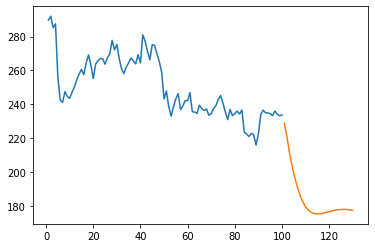

In [115]:
plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

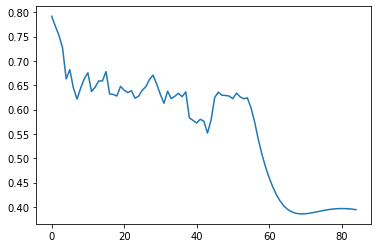

In [116]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1980:])

In [117]:
df3 = scaler.inverse_transform(df3).tolist()

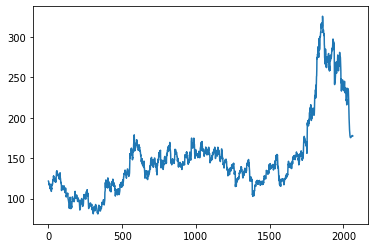

In [118]:
plt.plot(df3)